# The Making of a Star

In today's world, parents will stop at nothing to give their children the best chance for success.  Searching for the best schools, taking on endless extracurricular activities, and micromanaging the smallest details of their kids' lives is not uncommon for the modern day super moms and super dads.  In the sports world, the same applies.  With the rise in ultra-competitive travel sports and early specialization, parents will look for any advantage they can afford their little ones.  

What if there was a blueprint to follow that gave young boys the best chance to achieve their dreams and graduate from local recreational league all-star to a Major League Baseball All-Star?  Zealous parents would undoubtedly follow it verbatim.

The beauty of baseball is that players come in all different shapes, sizes, backgrounds, and schooling levels.  It's a heavily skill-based sport where most players cannot rely solely on their naturally given athleticism but must sharpen and refine their hitting and pitching mechanics to ascend.

However, that's not to say the highest level baseball players do not share some of the same attributes. The purpose of this study is to explore many of those attributes and answer this question: "Are there qualities that give a player the best chance to be successful and make a career out of baseball?"  Success in the game can take many forms: from MVPs to World Series titles to enshrinement in Cooperstown at the Hall of Fame.  To remove the team aspect and get a true sense of what it means to reach the pinnacle of a successful baseball career, two measurable parameters will the used: yearly salary and All-Star game appearances. These were chosen because high salaries suggest longevity and consistent success, and an All-Star game appearance speaks to a player being at the top of their profession for the position they play.

# Data Gathering

We start by importing the list of all baseball players from 1871 to 2015 from Sean Lahman's Baseball Database.  

In [659]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Master list containing personal information
all_players = pd.read_csv('Master.csv') 
len(all_players)

18846

The Major League Baseball All-Star Game originated in 1933, so that is where the next data  set begins.  This list is shorter in length because of the reduced time frame and fact that not everyone makes an All-Star team.

In [660]:
#list containing all-star appearances
mlb_allstar = pd.read_csv('AllstarFull.csv')
len(mlb_allstar)

5069

Each full All-Star team is included in the list, and some players made the team multiple times.  Therefore the next step is deleting duplicate entries for a player by searching playerID.  What results is a list of everyone who made the All-Star game listed once with their most recent All-Star game year.

In [661]:
#remove duplicates from list for repeat all-stars
nodup_mlballstar = mlb_allstar.drop_duplicates(['playerID'], keep='last') 
len(nodup_mlballstar) 

1741

The function merge_by_playerID is defined to merge any two Dataframes by matching playerID.  Since every All-Star should be in the Dataframe all_players from the Master list, we would expect the resulting merge to produce a Dataframe of matching length to the All-Star list.  The new Dataframe should be a list of all personal information about each All-Star.

In [662]:
def merge_by_playerID(df1, df2):  
    
    """define a function to merge 2 dataframes by playerID to be reused throughout"""
    
    return df1.merge(df2, on='playerID', how='inner')

#merge to have list of all-star personal information
allstars_personal = merge_by_playerID(all_players, nodup_mlballstar)
len(allstars_personal)

1740

Surprisingly, allstars_personal is shorter by one entry.  To find the problem, we search to find which entry is in nodup_mlballstar but not all_players.

In [663]:
#search for rogue entry in nodup_mlballstar
nodup_mlballstar[~nodup_mlballstar['playerID'].isin(all_players['playerID'])] 

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
4965,carperma01,2014,0,ALS201407150,SLN,NL,0.0,NaN


It appears that 2014 All-Star Matt Carpenter is listed under the playerID 'carperma01'.  To confirm the discrepancy, we searched for Carpenter's entry in the all_players Dataframe.  We find that his playerID here is 'carpema01'.

In [664]:
#search all_players to see what playerID he is listed under
print(all_players.loc[all_players['nameLast'] == 'Carpenter']) 

       playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
2580  carpean01     1985.0         5.0      18.0          USA         CA   
2581  carpebo01     1917.0        12.0      12.0          USA         IL   
2582  carpebu01     1968.0         7.0      23.0          USA         TX   
2583  carpech01     1975.0         4.0      27.0          USA         NH   
2584  carpech02     1985.0        12.0      26.0          USA         OH   
2585  carpecr01     1965.0         4.0       5.0          USA         FL   
2586  carpeda01     1985.0         7.0      15.0          USA         WV   
2587  carpeda02     1987.0         9.0       1.0          USA         TX   
2588  carpehi01     1855.0         8.0      16.0          USA         MA   
2589  carpele01     1913.0         8.0      16.0          USA         GA   
2590  carpema01     1985.0        11.0      26.0          USA         TX   
2591  carpepa01     1894.0         8.0      12.0          USA         OH   

          b

There was obviously a typographical error, so we need to find which is the true key that is consistently used throughout the rest of the data to be uploaded.  Therefore, we upload a .csv file that will be used later and search for the playerID 'carpema01'.

In [665]:
#list containing players attending college
college_players = pd.read_csv('CollegePlaying.csv') 

#search for his playerID used in Master
print(college_players.loc[college_players['playerID'] == 'carpema01']) 

       playerID  schoolID  yearID
2443  carpema01  txchrist    2005
2444  carpema01  txchrist    2006
2445  carpema01  txchrist    2007
2446  carpema01  txchrist    2008
2447  carpema01  txchrist    2009


The 'carpema01' playerID is used extensively in this set, confirming that it is the correct playerID for Matt Carpenter.  We now can go ahead and correct the data entry error in the nodup_mlballstar set.  It's found that Carpenter also had an entry for a separate year with the correct playerID in the All-Star set.

In [611]:
#find index where typo is and correct it
carper_location = nodup_mlballstar[nodup_mlballstar['playerID'] == 'carperma01'].index.tolist() 
corrected_allstars = nodup_mlballstar.set_value(carper_location, 'playerID', "carpema01") 

#shows there are now two instances of playerID 'carpeme01'
print corrected_allstars[corrected_allstars['playerID'] == 'carpema01'].index.tolist() 
print len(corrected_allstars)

[4888, 4965]
1741


We drop the duplicates of the Dataframe again and now have our final cleaned All-Star group.

In [666]:
#delete duplicate keeping name the same
corrected_allstars = corrected_allstars.drop_duplicates(['playerID'], keep='last') 
print len(corrected_allstars)

1740


With this finished All-Star Dataframe, we merge with all_players as we did at the beginning to create an All-Star list with personal information that we have more confidence is accurate.

In [667]:
#update allstars_personal to merge of corrected data
allstars_personal = merge_by_playerID(all_players, corrected_allstars) 
len(allstars_personal)

1740

Our final filter of the data is to remove all players not born in the United States.  Since our project question is tailored more towards American parents, American kids, and the American dream, it is important to consolidate the data to only American born players.  Also, a few of the attributes we will look at in detail (namely schooling and national geography) are much more pertinent for American players. 

In [668]:
#include only USA born player entries
usastars = allstars_personal[allstars_personal.birthCountry == 'USA'] 
len(usastars) 

1478

We want to add a few more attributes to our master list of All-Stars, and to do this we add columns for whether a player attended a university or junior college and whether the player is a pitcher. 

In [675]:
#contains all pitching data
pitching = pd.read_csv('Pitching.csv') #upload .csv with all pitching data

# return Boolean for if player is pitcher or attended college
usa_stars = usastars.copy() 
usa_stars['Pitcher'] = usa_stars.playerID.isin(pitching.playerID) 
usa_stars['College'] = usa_stars.playerID.isin(college_players.playerID) 
usa_stars.head() 

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bbrefID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,Pitcher,College
0,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,aaronha01,1975,0,ALS197507150,ML4,AL,1.0,NaN,False,False
1,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,aasedo01,1986,0,NLS198607150,BAL,AL,1.0,NaN,True,False
4,adamsac01,1910.0,3.0,2.0,USA,CA,Willows,2006.0,2.0,26.0,...,adamsac01,1943,0,ALS194307130,NY1,NL,0.0,NaN,True,False
5,adcocjo01,1927.0,10.0,30.0,USA,LA,Coushatta,1999.0,5.0,3.0,...,adcocjo01,1960,2,ALS196007130,ML1,NL,1.0,3.0,False,True
6,ageeto01,1942.0,8.0,9.0,USA,AL,Magnolia,2001.0,1.0,22.0,...,ageeto01,1967,0,ALS196707110,CHA,AL,1.0,NaN,False,True


Finally, the CSV with per year salaries for each player is merged with the usa_stars Dataframe.  All files and merges needed for our analysis are now complete.

In [676]:
#contains all salary data
salaries = pd.read_csv('Salaries.csv')

#create new df with salaries (will have duplicates because multiple years of salaries)
usastars_salaries = merge_by_playerID(usa_stars, salaries) 

# Analysis

Grouping the Dataframe by pitchers (True) and hitters (False), the first real observation to make is the difference in mean yearly salary.  Per the data, MLB All-Star position players averaged earning a little over $350,000 more yearly than pitchers.  A possible explanation is the longevity of a batter is expected to be longer than a pitcher because of pitchers' injury risks.  Shoulder and elbow injuries to labrums and ligaments can force pitchers to miss extended periods or full seasons more frequently than hitters, thus decreasing their value to clubs when contracts are up or even preventing pitchers from getting to their next big deal.

In [677]:
#group the df by the Boolean for 'Pitcher'
grouped_positions = usastars_salaries.groupby('Pitcher') #group the df by the Boolean for 'Pitcher'

print grouped_positions.describe()['salary']

Pitcher       
False    count    3.704000e+03
         mean     3.732155e+06
         std      4.633108e+06
         min      6.000000e+04
         25%      5.175000e+05
         50%      2.000000e+06
         75%      5.187500e+06
         max      3.300000e+07
True     count    3.341000e+03
         mean     3.373456e+06
         std      4.181213e+06
         min      6.000000e+04
         25%      5.000000e+05
         50%      1.650000e+06
         75%      4.675000e+06
         max      3.257100e+07
Name: salary, dtype: float64


With batters' salaries especially intriguing, it is important to group batters by right handed, left handed, or switch to see if there is any advantage to batting orientation.  Left handed batters look to be the big winners at the bank, scoring over \$250,000 more than right handers and over \$630,000 more than switch hitters per year.  This seems a little curious, as switch hitters are the most rare and one wouldn't expect left handers to have that great of an edge over them in career earnings.  One hypothesis is most left handed hitters are also left handed throwers, and left handed throwers are forced into playing either first base or an outfield position.  These positions are historically the most offensive minded positions on the field, and their offensive production leads to bigger paydays.     

In [678]:
def group_two_variables(df, key1, key2): 
    
    """function to group by two variables"""
    
    return df.groupby([key1, key2])

#group batting style by orientation and position
grouped_battingstyle = group_two_variables(usastars_salaries, 'bats', 'Pitcher') 

#create df from these keys looking at mean yearly salaries
hitter_salaries = grouped_battingstyle.mean()['salary'].reset_index() 
hitter_salaries.columns = ['Bats', 'Pitcher', 'Average Yearly Salary']

#look at only hitters' salaries
only_hitter_salaries = hitter_salaries[hitter_salaries['Pitcher'] == False] 
print only_hitter_salaries

,Bats,Pitcher,Average Yearly Salary
0,B,False,3.327732e+06
2,L,False,3.959333e+06
4,R,False,3.695517e+06


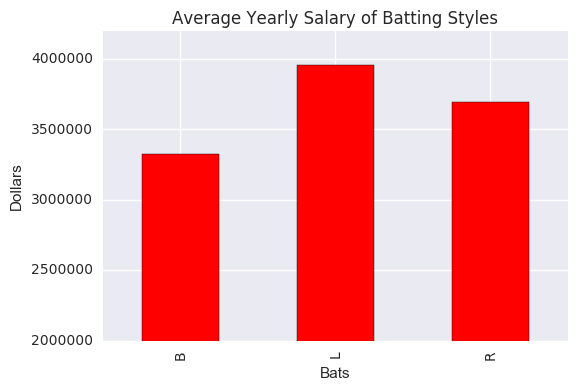

In [679]:
#plot only_hitter_salaries
ohs_plot = only_hitter_salaries.plot(x='Bats', y='Average Yearly Salary', kind='bar', ylim = (2000000,4200000), legend = False, title = 'Average Yearly Salary of Batting Styles', color = 'r')
ohs_plot.set(ylabel='Dollars')

To further explore the idea that left handed throwers have some relation to left handed batters, the players were grouped by how they throw.  Not surprisingly, left handed throwing non-pitchers garnered the highest average yearly salary.  A little shocking is the margin, though.  Lefties received $875,000 more yearly than their counterpart right handed throwing position players.  Again, lefthanded throwers are almost exclusively first basemen and outfielders as position players.  Their assumed power hitting at these spots should help explain their inflated pay.   

In [680]:
grouped_throwing_style = group_two_variables(usastars_salaries, 'throws', 'Pitcher')
#mean yearly salary for keys
throwing_salaries = grouped_throwing_style.mean()['salary'].reset_index() 
throwing_salaries.columns = ['Throws', 'Pitcher', 'Average Yearly Salary']

print throwing_salaries       

,Throws,Pitcher,Average Yearly Salary
0,L,False,4.463927e+06
1,L,True,3.452450e+06
2,R,False,3.585896e+06
3,R,True,3.337902e+06


For the next portion of the analysis, we look at college attendence for MLB All-Stars.  Both NCAA and junior college teams are counted in the data, and the main focus here is to determine if there is a more direct path to MLB stardom by skipping higher education to enter professional baseball out of high school.  The initial look shows 44.6% of All-Star pitchers and 38.5% of All-Star hitters attended college.  These statistics are surprisingly low.  Many top amateur baseball players show promise in high school and are eligible to be drafted and signed following their senior year, but still it would be shortsighted if we didn't take a closer look at why these numbers are so low.  

In [681]:
grouped_position = usa_stars.groupby('Pitcher') 

#take mean of Booleans in 'College' column
grouped_position.mean()['College'] 

Pitcher
False    0.385185
True     0.446108
Name: College, dtype: float64

Though the NCAA championship for baseball originated in 1947, the amateur game did not gain popularity until closer to the 1980s.  With the rise in hype surrounding the now-televised College World Series and increased financial support from university athletic departments to baseball programs, modern day college baseball is in a much different place than it was half a century ago.  Therefore in order to get a better grasp of whether college baseball is a viable route for a budding prospect, it is necessary to take a more recent look at MLB All-Stars and their education decisions.  

In [682]:
#create df of players who were allstars in 1980 or after
allstars_past_1980 = usa_stars.loc[usa_stars['yearID'] >= 1980] 

#group data by position
grouped_past_1980 = allstars_past_1980.groupby('Pitcher') 
grouped_past_1980.mean()['College'] 

Pitcher
False    0.524675
True     0.613636
Name: College, dtype: float64

The updated statistic of 61.3% of pitchers and 52.5% of hitters playing college baseball shows just how the game has grown at the amateur level in recent years.  With programs improving and high level athletes choosing to pursue an education while playing, the college game has seemingly become more competitive and a better place than before for players to hone their skills for the next level.  The roughly 9% difference between the positional groups still raises some questions but could be explained by scouts better identifying top level hitting prospects earlier and getting them signed to professional contracts.  Meanwhile pitchers could use the extra time as an amateur in college to prepare their skillset for the challenges of the professional level.

[<matplotlib.text.Text at 0x3bc72080>, <matplotlib.text.Text at 0x3bc64fd0>]

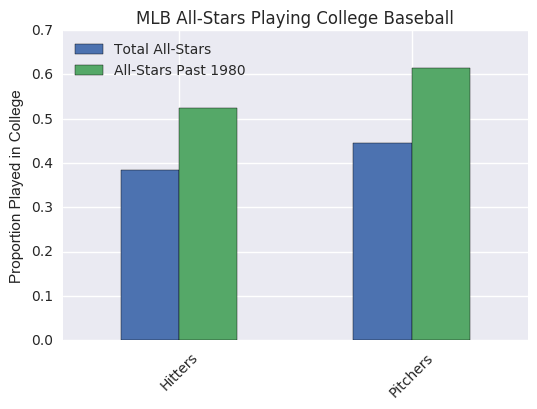

In [683]:
#remove index for first college df created
grouped_all_college = grouped_position.mean()['College'].reset_index() 
grouped_all_college.columns = ['Pitcher', 'Total All-Stars']

#remove index for second college df created
grouped_past_1980s = grouped_past_1980.mean()['College'].reset_index()
grouped_past_1980s.columns = ['Pitcher', 'All-Stars Past 1980']

#merge df of all college and recent college
college_player_comp = grouped_all_college.merge(grouped_past_1980s, on='Pitcher', how='inner') 

#plot college_player_comp data using the two specified columns 
coll_plot = (college_player_comp.loc[:,['Total All-Stars','All-Stars Past 1980']]).plot(kind = 'bar', title = 'MLB All-Stars Playing College Baseball')
coll_plot.set(ylabel = 'Proportion Played in College')
coll_plot.set_xticklabels(['Hitters', 'Pitchers'], rotation = 45)

The next attribute starts before a player even learns how to swing a bat or throw a ball.  Upbringing can be predictor of success in a lot of fields, and the environment that one lives plays a vital role.  Therefore, we next take a look at the birth places of all American MLB All-Stars.  Is a certain region or climate better? Does it seem to matter at all where you are born?

The resulting chart shows California, Texas, New York, Florida, and Illinois have produced the most All-Stars in that order.  This shouldn't come as a surprise.  These five states also happen to have the five highest populations of citizens in the United States.  Similarly, the five states with lowest totals are all states with some of the smallest proportions of the total US population.        

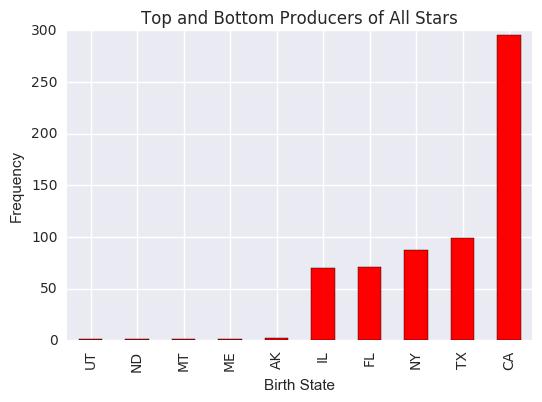

In [684]:
#group players from usa_stars by birth state and reset index
states = usa_stars.groupby('birthState').size().reset_index() 
states.columns = ['Birth State','Frequency'] 

#sort data by frequency and sort starting lowest to highest
states = states.sort_values(by=['Frequency'], ascending=[True]) 

def top_bottom_five(df):
    
    """function that takes a df and returns data frame with top 10% and bottom 10%"""
    
    return df.head(len(df)/10).append(df.tail(len(df)/10))

top_bottom_states = top_bottom_five(states) #use function to return top and bottom states

#plot data in bar graph 
tb_states_plot = top_bottom_states.plot(x='Birth State', y='Frequency', kind='bar', legend = False, title = 'Top and Bottom Producers of All Stars', color = 'r')
tb_states_plot.set(ylabel='Frequency')

To dig deeper, the state frequencies were turned into percentages of the population of All-Star players.  Also, the percentages of the total US population for each state were calculated and uploaded.  To determine if any state really overperforms or underperforms in producing the highest level ballplayers, the difference between these two percentages was found, and both the top and bottom 5 were again plotted.

The findings paint a much different picture than the first figure.  California again leads the way by a long shot, and the data points to the state being the premiere place for producing MLB All-Stars.  On the other hand, Texas and Florida were previously thought to be top producers, but the chart suggests that their production lags behind what would be expected from civilian populations of their size.  In all, it seems that pure population size of a state drives higher numbers of MLB All-Stars, but the theory of warmer climates being more efficient does not seem to be explicitly supported, evidenced by the performance of Texas, Arizona, and Florida. 

50


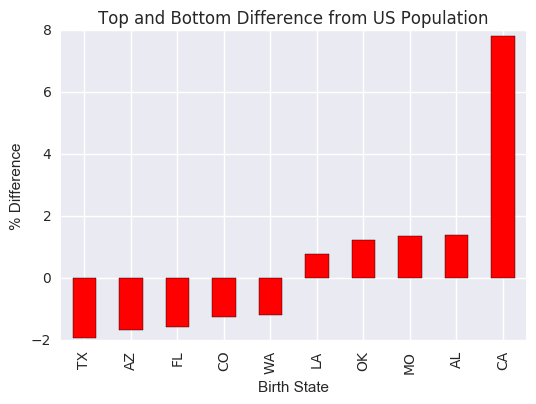

In [685]:
#contains % state population is of entire US population
real_pop = pd.read_csv('RealPop.csv')

states_copy = states.copy() 
#change frequency column to a percentage of total all-stars
states_copy.loc[:, 'Frequency'] = (statescopy['Frequency'] / (statescopy['Frequency'].sum())) * 100  
real_pop.columns = ['Birth State', 'US Population'] 
#merge by key birth state state % and us populations %
state_comp = states_copy.merge(real_pop, on='Birth State', how='inner')
print len(state_comp) 

state_diff = state_comp.copy()
#add column to df that shows all-star % minus US pop % and sort
state_diff['Difference'] = state_diff['Frequency']-state_diff['US Population'] 
state_diff_sorted = state_diff.sort_values(by=['Difference'], ascending=[True]) 

#return top 5 and bottom 5
top_bottom_diff = top_bottom_five(state_diff_sorted) 

#plot top_bottom_diff 
tbd = top_bottom_diff.plot(x='Birth State', y='Difference', kind='bar', legend = False, title = 'Top and Bottom Difference from US Population', color = 'r')
tbd.set(ylabel='% Difference') #set y label

The next attribute is inspired by recent public research on NHL players.  A study publish by PLOS ONE in 2013 stated that hockey players born in the first quarter of the year made up 36% of all players drafted in the NHL from 1980 to 2007.  The reasoning for the uneven proportion in the early months was cutoffs for select hockey teams occured at that time, making these players the oldest on the teams.  

The birth months of American born All-Stars are plotted below, and it seems the opposite is the case.  The first quarter appears to be a below the rest of the year.  The mode, August, is very important here.  The most MLB All-Stars have been born in that month, and there are a few possible explanations.  For one, July 31 has served for decades as the cutoff date for most recreational baseball leagues in America.  This means August born players would be the oldest on the teams.  Also, this coincides with the beginning dates of the school year for many public schools in America.  Unless a child is started early, kids born in August again will most likely be among the oldest in the grade.  Age translates to physical maturity and time to hone skills, so these kids will have an inherit edge in their younger years and more incentive to continue their careers in baseball having seen success.

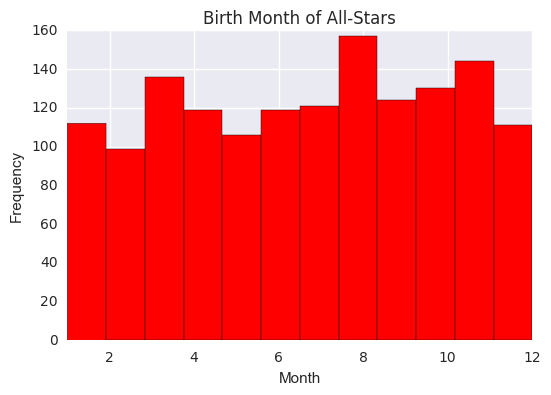

In [686]:
#plot column 'birthMonth' from usa_stars df
usa_stars['birthMonth'].hist(bins = 12, color = 'r')
plt.xlim([1,12])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Birth Month of All-Stars')
plt.show()

So far, a number of attributes have been analyzed to create an optimal path to stardom and wealth in baseball.  However, not every aspiring player reaches the pinnacle of the sport, for it's a game of numbers and the majority of signees will stall out in the minors or enjoy a short-lived major league career.  Therefore, the study will conclude with a review of debut ages for All-Stars to help determine whether a minor league player might still be on the path to greatness or fading past their window of opportunity.

In [687]:
#convert column from string to datetime
adjusted_debut = pd.to_datetime(usa_stars['debut']) 

#adjust integers in from usa_stars to numbers that can be recognized to translate to datetime
adjusted_birth = pd.to_datetime(usa_stars["birthYear"]*10000+usa_stars["birthMonth"]*100+usa_stars["birthDay"],format='%Y%m%d')
#calculate debut date minus birth date to get age
debut_age = adjusted_debut-adjusted_birth 
#adjust time to alldays
debut_age.astype('timedelta64[D]') 
#adjust days in datetime to days integer and convert from days to years
debut_days_integer = debut_age / np.timedelta64(1,'D') 
debut_years = debut_days_integer/365.25 

#create debutdf retaining .loc values from usa_stars and debut age
debutdf = pd.DataFrame({'Player':debut_years.index, 'age':debut_years.values}) 

print debutdf.describe()['age'] 

count    1478.000000
mean       22.931949
std         2.217781
min        15.863107
25%        21.535934
50%        22.859685
75%        24.166324
max        42.006845
Name: age, dtype: float64


The mean debut age of MLB All-Stars is 22.93, with a first quartile of 21.5 and third quartile 24.2.  This seems fairly young, but most of top prosepects don't spend a long time in the minor leagues.  The data seems to suggest that Major League teams quickly identify these top prospects and feel they can be an asset to their club at an early age, thus resulting in the young average debut age.  

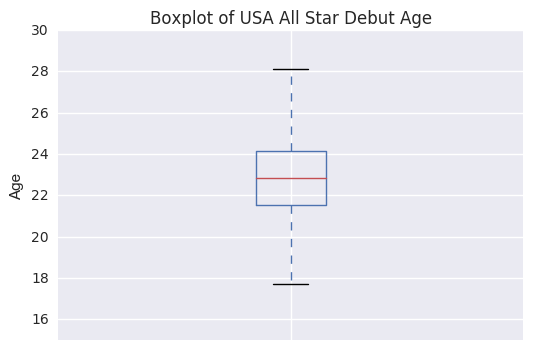

In [688]:
#create boxplot to visualize ages and removed xtick label of plot
ax = debutdf.plot(y='age', kind ='box', title = 'Boxplot of USA All Star Debut Age', ylim = (15,30)) 
ax.set(ylabel="Age") 
plt.tick_params(axis='x',which='both', bottom='off', top='off', labelbottom='off') 

The above boxplot shows the same information as the table above with an inner quartile range of 2.63 years.  Here the boxplot has taken into account the possibility of outliers in the data and removed them from the visual.  This was something that seemed curious in the descriptive statistics previously stated, especially with a minimum age of 15 years old and maximum of 42.  To take a closer look at what these outliers might represent and confirm the validity of the dataset, we'll search for where these maximums and minimums occur.

In [689]:
#find location of the max age value and go back to usa_stars value to see who entry corresponds to
print usa_stars.iloc[debutdf['age'].argmax()] 

playerID           paigesa01
birthYear               1906
birthMonth                 7
birthDay                   7
birthCountry             USA
birthState                AL
birthCity             Mobile
deathYear               1982
deathMonth                 6
deathDay                   8
deathCountry             USA
deathState                MO
deathCity        Kansas City
nameFirst            Satchel
nameLast               Paige
nameGiven       Leroy Robert
weight                   180
height                    75
bats                       R
throws                     R
debut             1948-07-09
finalGame         1965-09-25
retroID             paigs101
bbrefID            paigesa01
yearID                  1953
gameNum                    0
gameID          NLS195307140
teamID                   SLA
lgID                      AL
GP                         1
startingPos              NaN
Pitcher                 True
College                False
Name: 1190, dtype: object


The player corresponding to the maximum age of MLB debut for an eventual All-Star is Satchel Paige.  Paige actually made his professional baseball debut in 1926, but this came in the Negro Leagues as baseball at the time was segregated.  He was arguably the greatest pitcher ever to play the game, so it's not a surprise that when he finally was allowed to play in Major League Baseball in 1948 he still had enough left in the tank to earn All-Star status.

In [690]:
#find location of the min age value and go back to usa_stars value to see who entry corresponds to
usa_stars.iloc[debutdf['age'].argmin()]

playerID           nuxhajo01
birthYear               1928
birthMonth                 7
birthDay                  30
birthCountry             USA
birthState                OH
birthCity           Hamilton
deathYear               2007
deathMonth                11
deathDay                  15
deathCountry             USA
deathState                OH
deathCity          Fairfield
nameFirst                Joe
nameLast             Nuxhall
nameGiven       Joseph Henry
weight                   195
height                    75
bats                       L
throws                     L
debut             1944-06-10
finalGame         1966-10-02
retroID             nuxhj101
bbrefID            nuxhajo01
yearID                  1956
gameNum                    0
gameID          ALS195607100
teamID                   CIN
lgID                      NL
GP                         0
startingPos              NaN
Pitcher                 True
College                False
Name: 1156, dtype: object

The minimum debut age of 15 is equally as shocking but also has a sound explanation.  Joe Nuxhall was called upon to pitch for the Reds for one game in 1944 because of player shortages associated with World War II.  He eventually made it back to the big leagues in 1952 and made an All-Star team 3 years later.

These are just two anecdotal examples, but they do help bring to light an interesting point about baseball.  All types of people can reach the pinnacle of the game, but different events and personal trials can make that goal happen on a timeline a little different than what the player might have originally envisioned.  

With a few of these outliers explained, it's now time to explore the bulk of the data. The hope is to be able to determine if there is a certain cutoff age where the window of opportunity closes for an aspiring player to stay on the most travelled path to becoming an elite player.

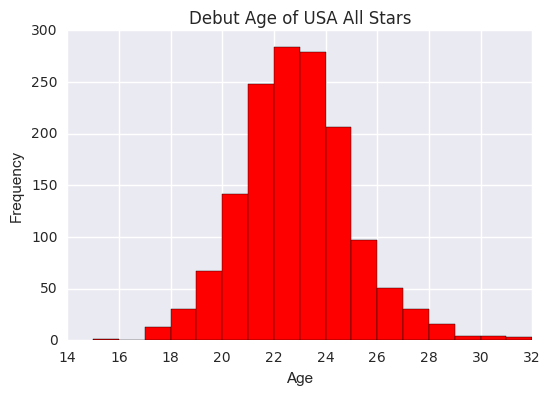

In [691]:
#plot the debutdf for age
debutdf['age'].hist(range=(14,32), color = 'red', bins = 18) 
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.title('Debut Age of USA All Stars') 
plt.xlim([14,32]) 
plt.show()

The above histogram is fairly normally distributed and as expected the visual confirms ages 21 to 23 to be the most common.  Since a debut age of 24 still has seen over 200 players go on to be All-Stars, it seems logical to use this age as a rough cutoff.  Age 25 has less than 100 All-Stars, and the frequency just decreases from there as ages increases.  Therefore, it's consistent with the data to have a marker around age 25 as the shrinking point for the window of opportunity of minor league players to become All-Star caliber.  In other words, it would be around this age where the likelihood of becoming an All-Star for a player yet to play in the Majors decreases substantially.

# Conclusion

It takes a lot of hard work, determination, and a little bit of luck along the journey to rise to stardom in Major League Baseball.  Every player in the study possessed something special that separated them from the rest of the pack and allowed them to become one of the game's finest.  In the end, the study suggests that top level hitters make more yearly than pitchers, and left handed hitting, left handed throwing position players are the highest paid commodity.  A majority of All-Stars in the modern era come from the collegiate ranks, though All-Star pitchers are more likely to attend than hitters.  After accounting for population differences, no region or climate particularly seemed to be a more fertile breeding ground for All-Star level talent.  However, the state of California produces the most and does it at a higher rate than one might expect from their population.  The month of August was the most common month of birth for All-Stars, and the second half of the calendar outweighed the first six months.  Finally, the majority of players of All-Stars have made their debut in the Majors by age 25.

All of the findings are tenative and based on some assumptions within the given data.  Every player is not born with the same athleticism or skillset, so assuming each player has the same chance to reach the elite level is shortsighted.  Also of note is that society and population tendencies have changed over time.  A great example of this is the maximum and minimum debut age research, where external factors that the player had no control over had a huge impact on the course of their careers.  Likewise, the game of baseball has tranformed many times throughout history from the Dead Ball era to the Steroid era to the modern day game.  The inferences drawn throughout the study are from the totality of this time frame and should be treated with caution as such.

Going forward, there are future studies into this same data that could attempt to explain or help prove some of the assumptions drawn.  In particular, it would be interesting to dive into the position break down and the hypotheses that were made about first baseman and outfielders being the most offensive minded on the field.  Along these lines, true correlations between lefty hitters throwing left handed and vice versa for righties would be enlightening, for it was assumed that by nature the majority of players were like this.  It would also be informative to research the longevity in the game of position players and pitchers.  The assumptions about injury rates for pitchers and their ability to stay on the field to get to more lucrative deals would be very pertinent topics to further investigate.  Finally, the data was sorted to exclude all players born outside the United States, and foreign born plays certainly play a significant role in the landscape of professional baseball today.

# Resources

"Delete Duplicates in Pandas." Chis Albon. http://chrisalbon.com/python/pandas_delete_duplicates.html

"Select Rows from a Dataframe." Stackoverflow. http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

"Delete Dataframe Row." Stackoverflow. http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

"Python, Best Way to Convert." Stackoverflow. http://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe

"Pyplot." Matplotlib. http://matplotlib.org/api/pyplot_api.html

"Joe Nuxhall." Wikipedia. https://en.wikipedia.org/wiki/Joe_Nuxhall

"First All-Star Game." Google. https://www.google.com/#q=when+was+the+first+mlb+all+star+game

"Converting a Column." Stackoverflow. http://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string

"Select Rows." Stackoverflow. http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

"Exclude a Few Columns." Stackoverflow. http://stackoverflow.com/questions/13003051/how-do-i-exclude-a-few-columns-from-a-dataframe-plot

"Aligning Rotated xticklabels." Stackoverflow. http://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks

"NHL Selection Bias." Wired. https://www.wired.com/2013/03/nhl-selection-bias/

"Plotting with Groupby." Udacity Forum. https://discussions.udacity.com/t/plotting-with-groupby/214825/2

"Boxplot Column Label." Udacity Forum. https://discussions.udacity.com/t/boxplot-column-label/214693/2

"Combining Columns for Datetime." Udacity Forum. https://discussions.udacity.com/t/combining-columns-for-datetime/214486

".groupby Histograms." Udacity Forum. https://discussions.udacity.com/t/groupby-histograms/214404

"Add a Column of Booleans." Udacity Forum. https://discussions.udacity.com/t/add-column-of-booleans-in-pd/214191

"Change a value in df." Udacity Forum. https://discussions.udacity.com/t/baseball-p2-change-a-value-in-df/214140

"Satchel Paige." Wikipedia. https://en.wikipedia.org/wiki/Satchel_Paige

"List of US States." Wikipedia. https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population
